# **Number Plate Detection Model**

First change runtime type to **GPU**

Create a folder in Google Drive, I created it with Name ML. Inside ML I created one sub folder name **yolov4** - this project is going to use YoloV4 as a detection model.

Connect with Google Drive. It help in reusing downloaded files even with new instance of collab.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Now change directory to required folder i.e. **gdrive/My Drive/ML/yolov4**

In [ ]:
%cd gdrive/My Drive/ML/yolov4

[Errno 2] No such file or directory: 'gdrive/My Drive/ML/yolov4'
/content/gdrive/MyDrive/ML/yolov4/darknet


Now download **https://github.com/AlexeyAB/darknet** model and it is saved in darknet folder inside current directory.

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


Change directory to darknet folder.

In [ ]:
%cd darknet

[Errno 20] Not a directory: 'darknet'
/content/gdrive/MyDrive/ML/yolov4/darknet


Upload the following files to **yolov4** folder.
1. obj.zip - contains training images and lables.
2. test.zip - contains testing images and labels.
3. All files from **https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial/tree/master/yolov4**

As shown on Image below.






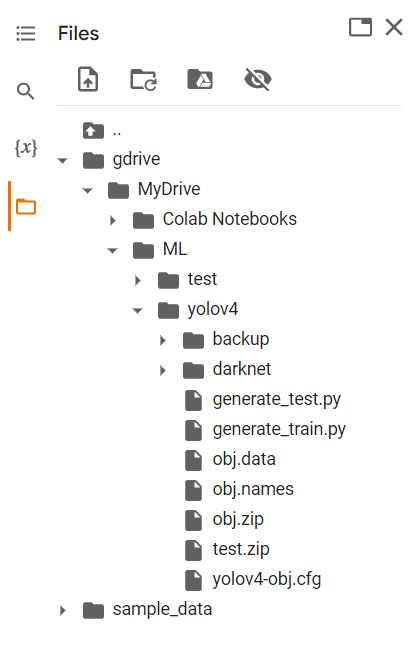

Now let's configure darknet processing.

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

Let's see current GPU version.

In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


Run **make** command darknet code now.

In [ ]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv

Copy obj.zip and test.zip from **../** to **data/**

In [ ]:
!cp ../obj.zip data/
!cp ../test.zip data/

Unzip files in **data/** folder

In [ ]:
!unzip data/obj.zip -d data/obj
!unzip data/test.zip -d data/test

Archive:  data/obj.zip
replace data/obj/BS01.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/obj/BS01.jpg       
  inflating: data/obj/BS01.txt       
  inflating: data/obj/BS02.jpg       
  inflating: data/obj/BS02.txt       
  inflating: data/obj/BS03.jpg       
  inflating: data/obj/BS03.txt       
  inflating: data/obj/BS04.jpg       
  inflating: data/obj/BS04.txt       
  inflating: data/obj/BS05.jpg       
  inflating: data/obj/BS05.txt       
  inflating: data/obj/BS06.jpg       
  inflating: data/obj/BS06.txt       
  inflating: data/obj/BS07.jpg       
  inflating: data/obj/BS07.txt       
  inflating: data/obj/BS08.jpg       
  inflating: data/obj/BS08.txt       
  inflating: data/obj/BS09.jpg       
  inflating: data/obj/BS09.txt       
  inflating: data/obj/BS10.jpg       
  inflating: data/obj/BS10.txt       
  inflating: data/obj/BS11.jpg       
  inflating: data/obj/BS11.txt       
  inflating: data/obj/BS12.jpg       
  inflating: data/obj/BS12.txt      

Copy configured file from **../yolov4-obj.cfg** to **cfg/**

How to configure **yolov4-obj.cfg** explained below.

Now you need to edit the .cfg to fit your needs based on your object detector. Open it up in a code or text editor to do so.

If you downloaded cfg to google drive you can use the built in  **Text Editor** by going to your google drive and double clicking on yolov4-obj.cfg and then clicking on the **Open with** drop down and selectin **Text Editor**.

**(Image from previous tutorial so don't mind different file name)**

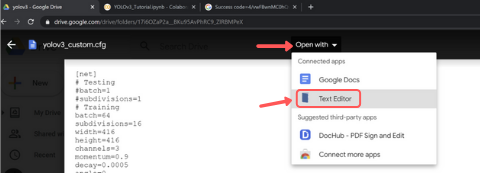

I recommend having **batch = 64** and **subdivisions = 16** for ultimate results. If you run into any issues then up subdivisions to 32.

Make the rest of the changes to the cfg based on how many classes you are training your detector on.

**Note:** 
I set my **max_batches = 6000**, **steps = 4800, 5400**, I changed the **classes = 1** in the three YOLO layers and **filters = 18** in the three convolutional layers before the YOLO layers.

How to Configure Your Variables:

width = 416

height = 416
**(these can be any multiple of 32, 416 is standard, you can sometimes improve results by making value larger like 608 but will slow down training)**

max_batches = (# of classes) * 2000
**(but no less than 6000 so if you are training for 1, 2, or 3 classes it will be 6000, however detector for 5 classes would have max_batches=10000)**

steps = (80% of max_batches), (90% of max_batches)
**(so if your max_batches = 10000, then steps = 8000, 9000)**

filters = (# of classes + 5) * 3
**(so if you are training for one class then your filters = 18, but if you are training for 4 classes then your filters = 27)**


**Optional:** If you run into memory issues or find the training taking a super long time. In each of the three yolo layers in the cfg, change one line from random = 1 to **random = 0** to speed up training but slightly reduce accuracy of model. Will also help save memory if you run into any memory issues.


In [ ]:
!cp ../yolov4-obj.cfg cfg/

Copy other configuration files which are obj.names and obj.data from **../** to **/data**

**obj.names contains all labels required for training as show in image below.**
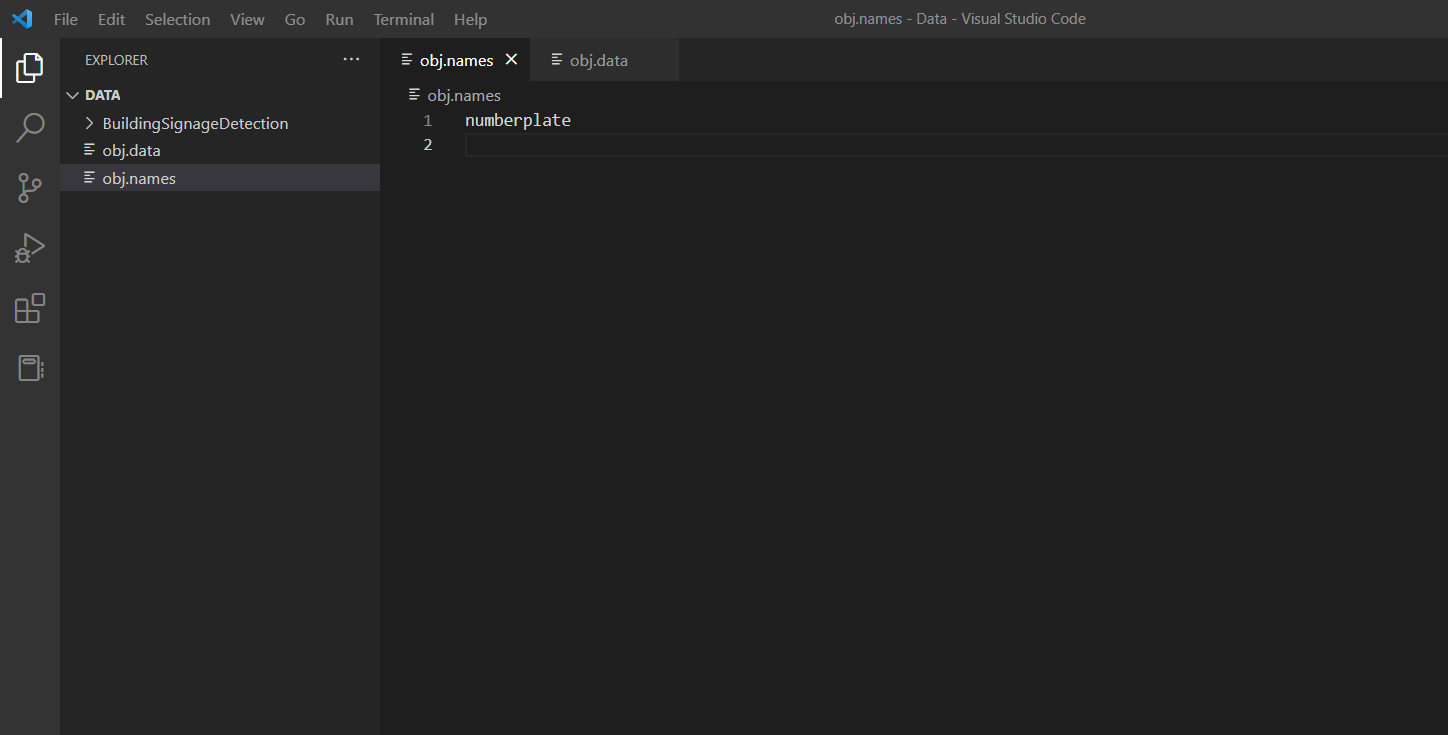

**obj.data  contains configuration informations as show in image.**

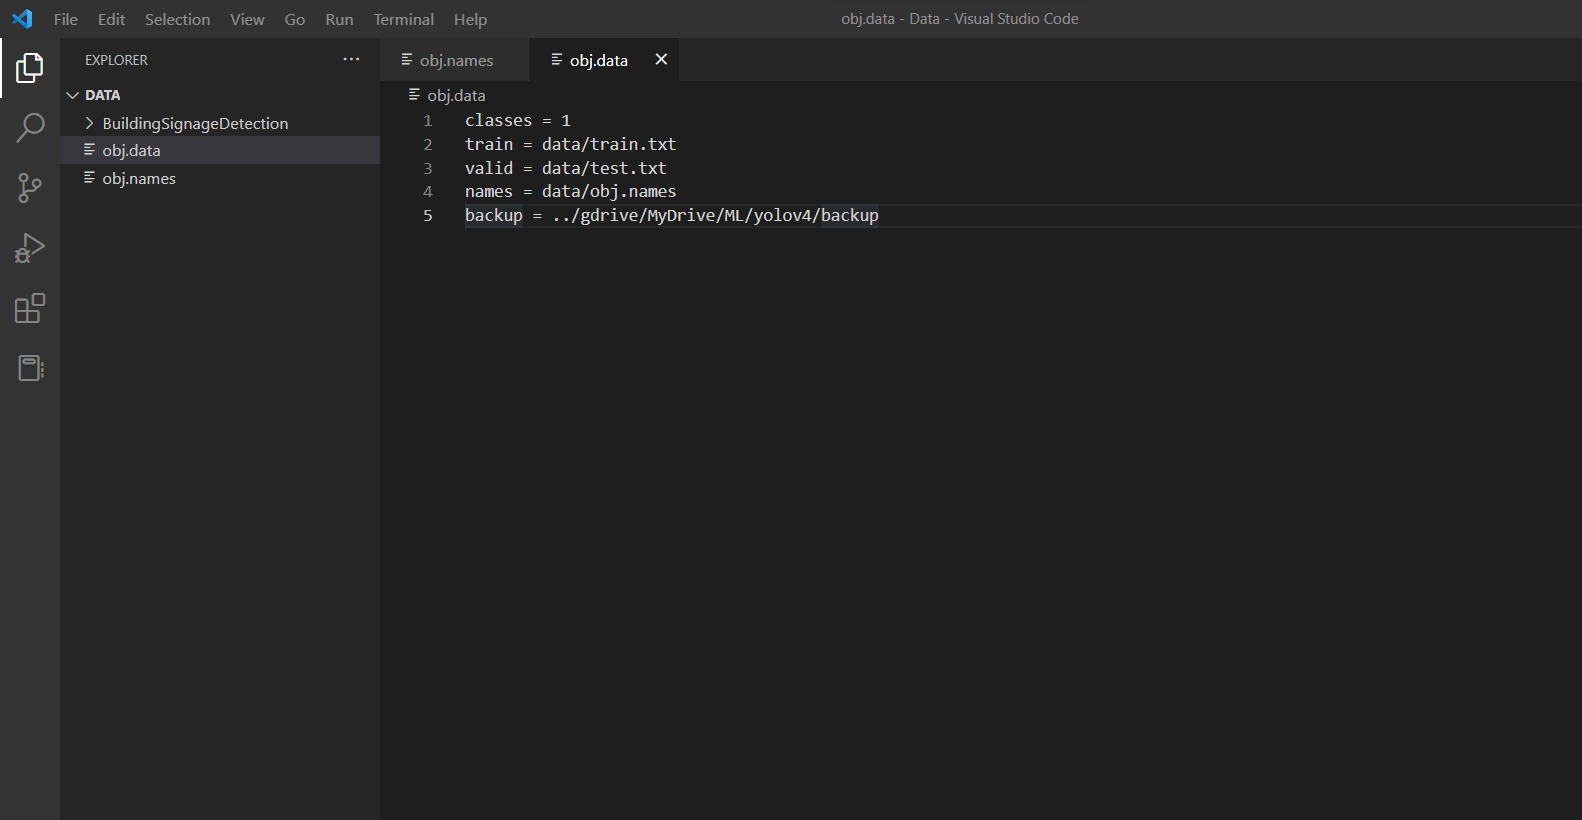

In [ ]:
!cp ../obj.names data/
!cp ../obj.data data/

Copy **generate_test.py** and **generate_train.py** into **darkent** folder, this code creates a files which helps model to locate required images.

In [ ]:
!cp ../generate_train.py ./
!cp ../generate_test.py ./

Execute both **generate_test.py** and **generate_train.py** files.

In [ ]:
!python generate_train.py
!python generate_test.py

Double check **train.txt** and **test.txt** files in **data/ folder**

In [ ]:
!ls data/

9k.tree     giraffe.jpg		      labels	 openimages.names  test.zip
coco9k.map  goal.txt		      obj	 person.jpg	   train.txt
coco.names  horses.jpg		      obj.data	 scream.jpg	   voc.names
dog.jpg     imagenet.labels.list      obj.names  test
eagle.jpg   imagenet.shortnames.list  obj.zip	 test.txt


Now it's time to build the requested model.

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.weights -dont_show -map

**Congratulations!** after some time your model will be build sucessfully in the ../**backup** folder and the name of model files is **yolov4-obj_last.weights**.



```
 
```



# **To test and predict from the model**

First, configure trained model.


In [ ]:

%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/gdrive/MyDrive/ML/yolov4/darknet/cfg
/content/gdrive/MyDrive/ML/yolov4/darknet


Now testing it on the **../../test/Val07.jpg**

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg ../backup/yolov4-obj_last.weights -ext_output ../../test/Val07.jpg -thresh 0.3  > output.txt

/bin/bash: ./darknet: No such file or directory
